In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

#import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
_URL = 'https://drive.google.com/u/0/uc?id=1Wa8sX1eoANrZFIplb_v9TYzWOUxV6jja&export=download'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [0]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("-"*25)
print("Total training images:", total_train)
print("Total validation images:", total_val)

In [0]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150
IMG_SHAPE = (156,256,3)

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [0]:
image_gen_train = ImageDataGenerator(
                      featurewise_center=True,
                      featurewise_std_normalization=True,
                      rotation_range=20,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      horizontal_flip=True,
                      rescale=1./255
                      )
image_gen_val = ImageDataGenerator(
                      #featurewise_center=True,
                      #featurewise_std_normalization=True,
                      #rotation_range=20,
                      #width_shift_range=0.2,
                      #height_shift_range=0.2,
                      #horizontal_flip=True,
                      rescale=1./255
                      )

In [0]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           seed = 12,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 601 images belonging to 2 classes.


In [0]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              shuffle=True,
                                                              seed = 12,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 193 images belonging to 2 classes.


In [0]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [0]:
from tensorflow.keras import backend as K
K.clear_session()
from tensorflow.keras.models import Model

In [0]:
from tensorflow.keras.layers import Input
inputs=Input(shape=(IMG_HEIGHT, IMG_WIDTH ,3),name='Input_Layer')
model_new = tf.keras.applications.vgg16.VGG16(input_shape=(IMG_HEIGHT, IMG_WIDTH ,3),
                                               include_top=False,
                                               weights='imagenet')(inputs)

In [0]:
layer1=Conv2D(16, 3, padding='same', activation='relu')(model_new)
layer2=MaxPooling2D()(layer1)
layer3=Conv2D(32, 3, padding='same', activation='relu')(layer2)
layer4=MaxPooling2D()(layer3)
layer5=Flatten()(layer4)
layer6=Dense(512, activation='relu')(layer5)
output=Dense(1, activation='sigmoid')(layer6)
model_final=Model(inputs=inputs,outputs=output)

In [0]:
#from keras.layers import Compile
model_final.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_final.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 150, 150, 3)]     0         
_________________________________________________________________
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
conv2d (Conv2D)              (None, 4, 4, 16)          73744     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 16)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 32)          4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0     

In [0]:
history = model_final.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 4 steps, validate for 1 steps
Epoch 1/15


/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1/4 [======>.......................] - ETA: 5:14 - loss: 0.6969 - accuracy: 0.4609

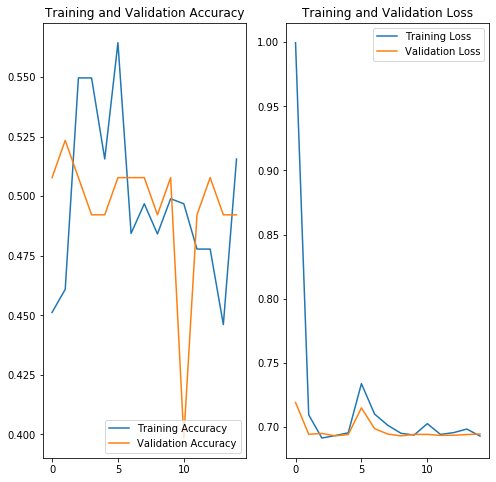

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
from keras.preprocessing import image
test_image= image.load_img('try.jpg',target_size = (IMG_WIDTH, IMG_HEIGHT))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
x = test_image.reshape(1,3,IMG_HEIGHT,IMG_WIDTH)

result = model_final.predict(x, batch_size=None, verbose=0, steps=1, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)
print(result)
if result[0][0] < 0.5:
  print("cat")
else:
  print("dog")